In [6]:
import json
import pandas as pd

filename = 'reviews_Sports_and_Outdoors_5.json'
with open(filename, 'rb') as f:
    oriData = f.readlines()
columns = ['reviewText', 'overall']
data = []
for i in range(len(oriData)):
    oriData[i] = json.loads(oriData[i])
    rowData = [oriData[i]['reviewText'], float(oriData[i]['overall'])]
    data.append(rowData)
reviewSet = pd.DataFrame(data = data, columns = columns)
reviewSet.head()

,reviewText,overall
0,This came in on time and I am veru happy with ...,5.0
1,I had a factory Glock tool that I was using fo...,5.0
2,If you don't have a 3/32 punch or would like t...,4.0
3,This works no better than any 3/32 punch you w...,4.0
4,I purchased this thinking maybe I need a speci...,4.0


In [7]:
reviewSet.to_pickle("AmazonReviewSet")

In [1]:
import pandas as pd
reviewSet = pd.read_pickle("AmazonReviewSet")
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1, 3), max_df = 0.5, min_df = 2)
reviewSet20000 = reviewSet.head(20000)
test = tfidf.fit_transform(reviewSet20000['reviewText'])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test, reviewSet20000['overall'].tolist(), test_size = 0.1)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
# print predictions, y_test
scores = [abs(predictions[i] - y_test[i]) for i in range(len(y_test))]
resultList = []
for i in range(len(y_test)):
    sameClass = 0
    if predictions[i] >= 3.5 and y_test[i] >= 3.5:
        sameClass = 1
    elif predictions[i] >= 2.5 and y_test >= 2.5:
        sameClass = 1
    elif predictions[i] < 2.5 and y_test < 2.5:
        sameClass = 1
    resultList.append(sameClass)

print sum(resultList) / (len(resultList) * 1.0) 
print sum(scores)/(len(scores) * 1.0)
# print lr.score(X_test, y_test)


0.994
0.573828241506


In [25]:
import json
import pandas as pd

filename = 'TwitterData.json'
with open(filename, 'rb') as f:
    oriData = f.readlines()

columns = ["text"]
data = []
for i in range(50000):
    rowData = json.loads(oriData[i])
    try:   
        text = [rowData["text"]]
        rowData = [rowData["text"]]
        data.append(text)
    except KeyError:
        print "Key Error"
twitterText = pd.DataFrame(data = data, columns = columns)
twitterText.head()

Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error
Key Error


,text
0,https://t.co/luFhXU4lfj
1,Оценка недвижимости https://t.co/OueoohMWec
2,Não vou + de Kenner pra santa cruz nn vou arr...
3,RT @hugo_revil: Nike le tour du 🌎 j'ai ton tou...
4,RT @MessiQuote: adidas: \n\n“The Greatest.\nNo...


In [26]:
nikeData = []
adiData = []
ajData =[]
uaData = []
for index, row in twitterText.iterrows():
    text = row['text']
    if 'nike' in text or 'Nike' in text:
        nikeData.append([text])
    if 'adidas' in text or 'adi' in text:
        adiData.append([text])
    if 'aj' or 'jordan' in text:
        ajData.append([text])
    if 'UnderArmour' in text or 'ua' in text:
        uaData.append([text])
column = ['text']
nikeDf = pd.DataFrame(columns = column, data = nikeData)
adiDf = pd.DataFrame(columns = column, data = adiData)
ajDf =pd.DataFrame(columns = column, data = ajData)
uaDf = pd.DataFrame(columns = column, data = uaData)

In [27]:
print nikeDf.shape[0], adiDf.shape[0], ajDf.shape[0], uaDf.shape[0]

11575 10071 49964 2285


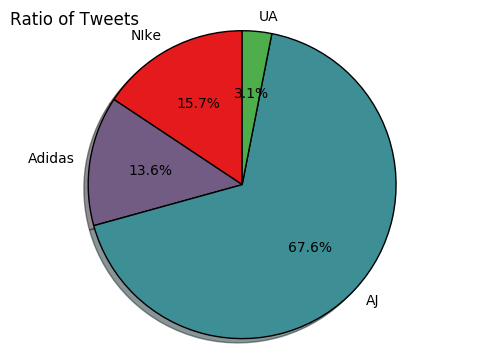

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
labels = 'NIke', 'Adidas', 'AJ', 'UA'
sizes = [nikeDf.shape[0], adiDf.shape[0], ajDf.shape[0], uaDf.shape[0]]
explode = (0, 0, 0, 0)

cs=cm.Set1(np.arange(4)/12.)
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = cs)
plt.axis('equal') 
plt.title("Ratio of Tweets", loc = 'left')
plt.show()

In [7]:
stopWords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'de',
'da', 'RT', '-', '', ',', ',', 'nike', 'Nike', 'jveux', 'casacos', '@qqlmerdameu:', '1'
, 'via', u's\xe3o', u't\xe3o', u'\U0001f3c6\U0001f3c5Ready', u'\U0001f64f\U0001f3fe\U0001f44a\U0001f3fe',
u'zool\xf3gico',u'\u0438',u'\u0412', u'@tsnua:', u'@tchxng:', u'#\u043d\u043e\u0432\u043e\u0441\u0442\u0438',
u'\u0432', u'unos', u'tampoco', u'\u0432',u'del', u'Caricuao',u'negligencia',u'muere',u'presunta',
  u'\u043d\u0430',u'Por',u'cuando',u'pero',u'No',u'Odio',u'dicen:',u'alcohol',u'correr,' u'\u0410\u0422\u041e',
  u'\u2022',u'#\u0422\u0421\u041d',u'\xab\u0410\u041d\u0422\u0418\u041a\u041e\u0420\xbb',u'\u0443']

In [9]:
from nltk.corpus import stopwords
nikeWords = {}
adiWords = {}
ajWords = {}
uaWords = {}
nikeTenKeyWords = []
adiTenKeyWords = []
uaTenKeyWords = []
ajTenKeyWords = []
brandDataList = [nikeDf, adiDf, uaDf, ajDf]
wordsList = [nikeWords, adiWords, uaWords, ajWords]
keyWordsList = [nikeTenKeyWords, adiTenKeyWords, uaTenKeyWords, ajTenKeyWords]
for i in range(len(brandDataList)):
    for index, row in brandDataList[i].iterrows():
        text = row['text'].split(' ')
        for word in text:
            if len(word) < 11 and '\\' not in word  and word not in stopWords:
                if word in wordsList[i]:
                    wordsList[i][word] += 1
                else:
                    wordsList[i][word] = 1
for i in range(len(wordsList)):
    keyWordsList[i] = sorted(wordsList[i], key = wordsList[i].get, reverse = True)[:100]             

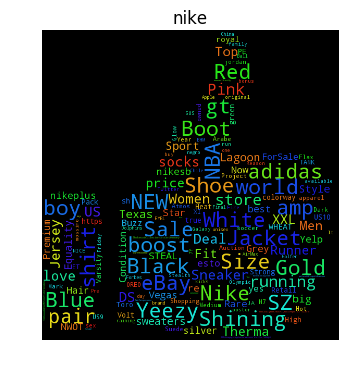

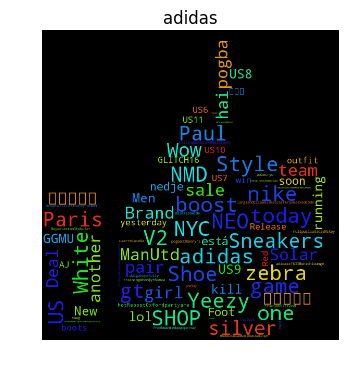

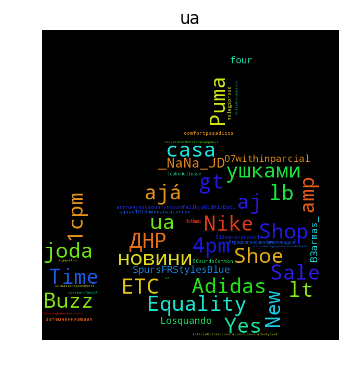

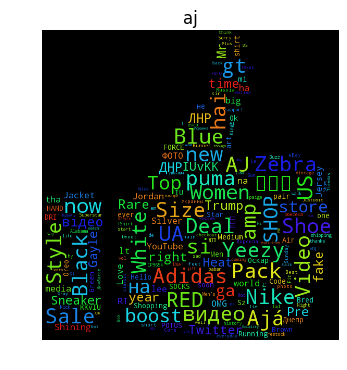

In [10]:
from wordcloud import WordCloud
import random
from scipy.misc import imread
import matplotlib.pyplot as plt
brandNames = ['nike', 'adidas', 'ua', 'aj']
for i in range(len(wordsList)):
    text = ''.join(wordsList[i])
    wordcloud = WordCloud().generate(text)
    mask = imread("like.png")
    wordcloud = WordCloud(max_font_size=40, mask = mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(brandNames[i])
    plt.show()

In [11]:
for i in range(len(keyWordsList)):
    print '{} most frequently words are : \n {}'.format(brandNames[i], keyWordsList[i])

nike most frequently words are : 
 [u'Air', u'Size', u'Jordan', u'Max', u'#Nike', u'11', u'Black', u'Retro', u"Men's", u'New', u'Shoes', u'#Shoes', u'10', u'Sz', u'12', u'9', u'White', u'10.5', u'I', u'#shoes', u'DS', u'size', u'Blue', u'Red', u'Mens', u'Flyknit', u'Foamposite', u'The', u'13', u'Low', u'8', u'9.5', u'Running', u'90', u'x', u'2', u'Force', u'la', u'XI', u'NEW', u'Pro', u'Premium', u'Adidas', u'reklam\u0131', u'yeni', u'3', u'Kobe', u'Zoom', u'@Nike', u'Basketball', u'5', u'#nike', u'Orta', u'Do\u011fu', u"Nike'nin", u'Sneakers', u'4', u'para', u'11.5', u'Dunk', u'os', u'giros', u'2016', u'got', u'adoro', u'Lebron', u'necesitas', u'Grey', u'14', u"Women's", u'#Retro', u'@CUOREfr:', u'SZ', u'7', u'One', u'Ultra', u'KD', u'SB', u'Supreme', u'6', u'&amp;', u'air', u'shit', u'Huarache', u"ain't", u'8.5', u'QS', u'OG', u'sz', u'/', u'High', u'#Yeezy', u'US', u'Free', u'\U0001f525\nShop', u'FREE', u'AF1', u'SIZE', u'2017', u'\U0001f525']
adidas most frequently words are : 
 [u

In [14]:
brandDataList[0].to_pickle("nikeData")
brandDataList[1].to_pickle("adiData")
brandDataList[2].to_pickle("uaData")
brandDataList[3].to_pickle("ajData")

In [4]:
import pandas as pd
nikeDf = pd.read_pickle("nikeData")
adiDf = pd.read_pickle("adiData")
uaDf = pd.read_pickle("uaData")
ajDf = pd.read_pickle("ajData")

In [2]:
nikeDf.shape
reviewSet = pd.read_pickle("AmazonReviewSet")

In [11]:
brandDataList = [nikeDf, adiDf, uaDf, ajDf]
brandName = ['nike', 'adidas', 'ua', 'aj']

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
tfidf = TfidfVectorizer(ngram_range = (1, 3), max_df = 0.5, min_df = 5, stop_words = stopWords)
reviewSubset = reviewSet.head(15000)
sentimentRecord = {}
for i in range(len(brandDataList)):
    brandData = brandDataList[i]
    brandData.columns = ['reviewText']
    if brandData.shape[0] > 20000:
        brandData = brandData[:15000]
    reviewCombine = reviewSubset.append(brandData)
    test = tfidf.fit_transform(reviewCombine['reviewText'].values.astype('U'))
    X_train = test[:15000]
    X_test = test[15000:]
    y_train = reviewCombine[:15000]['overall']
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    positiveTwitters, neutralTwitters, negativeTwitters = 0, 0, 0
    for prediction in predictions:
        if prediction >= 4:
            positiveTwitters += 1
        elif prediction >= 3:
            neutralTwitters += 1
        else:
            negativeTwitters += 1
            
    sentimentRecord[brandName[i] + 'positiveTwitters'] = positiveTwitters
    sentimentRecord[brandName[i] + 'neutralTwitters'] = neutralTwitters
    sentimentRecord[brandName[i] + 'negativeTwitters'] = negativeTwitters
    

    print positiveTwitters, neutralTwitters, negativeTwitters

8311 2591 673
2082 7655 334
1838 337 110
10057 3796 1147


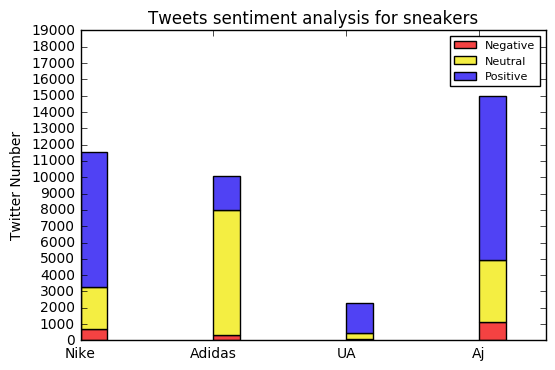

In [55]:
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt


positiveNo = []
neutralNo = []
negativeNo = []
for brand in brandName:
    positiveNo.append(sentimentRecord[brand + 'positiveTwitters'])
    neutralNo.append(sentimentRecord[brand + 'neutralTwitters'])
    negativeNo.append(sentimentRecord[brand + 'negativeTwitters'])
    
negAndNeu = [neutralNo[i] + negativeNo[i] for i in range(4)]

N = 4

ind = np.arange(N)
width = 0.2

p1 = plt.bar(ind, negativeNo, width, color = '#f44242')
p2 = plt.bar(ind, neutralNo, width, color = '#f4ee42', bottom = negativeNo)
p3 = plt.bar(ind, positiveNo, width, color = '#5042f4', bottom = negAndNeu)


plt.ylabel('Twitter Number')
plt.title('Tweets sentiment analysis for sneakers')
plt.xticks(ind, ('Nike', 'Adidas', 'UA', 'Aj'))
plt.yticks(np.arange(0, 20000, 1000))
plt.legend((p1[0], p2[0], p3[0]), ('Negative', 'Neutral', 'Positive'), fontsize = 8)

plt.show()
